# Breast Cancer prediction

## Importing Required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
columns=["sam_code_num","Clump_thick","Uni_of_Cell_Size","Uni_of_Cell_Shape","Marginal_Adhesion","Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoes","Class"]
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=columns,na_values="?")

In [3]:
data.head()

,sam_code_num,Clump_thick,Uni_of_Cell_Size,Uni_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoes,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
data.tail()

,sam_code_num,Clump_thick,Uni_of_Cell_Size,Uni_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoes,Class
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [6]:
data.shape

(699, 11)

In [7]:
data.columns

Index(['sam_code_num', 'Clump_thick', 'Uni_of_Cell_Size', 'Uni_of_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoes', 'Class'],
      dtype='object')

## Handling missing data

## Cleaning data

In [8]:
data.isnull().sum()

sam_code_num                    0
Clump_thick                     0
Uni_of_Cell_Size                0
Uni_of_Cell_Shape               0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoes                          0
Class                           0
dtype: int64

In [9]:
data.Bare_Nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [10]:
data.Bare_Nuclei.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nuclei, dtype: float64

In [11]:
# Filling the missing values with mean since it is an cont.
data.Bare_Nuclei.fillna(3.544656,inplace=True)

In [12]:
data.Bare_Nuclei.isnull().sum()

0

In [13]:
data.isnull().sum()

sam_code_num                   0
Clump_thick                    0
Uni_of_Cell_Size               0
Uni_of_Cell_Shape              0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoes                         0
Class                          0
dtype: int64

In [14]:
data.Clump_thick.describe()

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump_thick, dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sam_code_num                 699 non-null    int64  
 1   Clump_thick                  699 non-null    int64  
 2   Uni_of_Cell_Size             699 non-null    int64  
 3   Uni_of_Cell_Shape            699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoes                       699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


## Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x22ad101dee0>,
 'caps': [<matplotlib.lines.Line2D at 0x22ad103a580>,
 'boxes': [<matplotlib.lines.Line2D at 0x22ad101da90>],
 'medians': [<matplotlib.lines.Line2D at 0x22ad103aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22ad1046070>],
 'means': []}

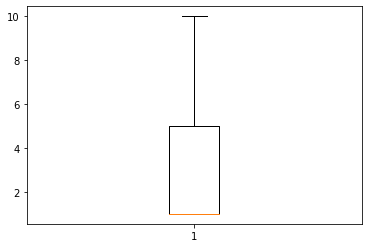

In [16]:
plt.boxplot(data.Bare_Nuclei)

## Splitting into test and train 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y=data.Class
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


In [19]:
x=data.drop('Class',axis=1)
print(x)

     sam_code_num  Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  \
0         1000025            5                 1                  1   
1         1002945            5                 4                  4   
2         1015425            3                 1                  1   
3         1016277            6                 8                  8   
4         1017023            4                 1                  1   
..            ...          ...               ...                ...   
694        776715            3                 1                  1   
695        841769            2                 1                  1   
696        888820            5                10                 10   
697        897471            4                 8                  6   
698        897471            4                 8                  8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1                            2          1.0   
1          

In [20]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state =100)

In [21]:
print(train_x)
print(test_x)
print(train_y)
print(test_y)

     sam_code_num  Clump_thick  Uni_of_Cell_Size  Uni_of_Cell_Shape  \
491       1119189            5                 8                  9   
614       1031608            2                 1                  1   
277        452264            1                 1                  1   
404       1223543            1                 2                  1   
529       8233704            4                 1                  1   
..            ...          ...               ...                ...   
578        695219            1                 1                  1   
53        1110503            5                 5                  5   
350        836433            5                 1                  1   
79        1136142            2                 1                  1   
520        333093            1                 1                  1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
491                  4                            3         10.0   
614        

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_x,train_y)
model.score(train_x,train_y)

0.960644007155635

In [23]:
predicted_value=model.predict(test_x)
print(predicted_value)

[2 4 4 4 2 2 2 2 4 4 4 2 2 2 4 2 2 4 2 4 4 2 2 2 4 4 4 2 2 4 2 4 2 4 4 2 4
 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 4 4 4 2 4 2 2 4 2 4 2 4
 4 2 2 2 4 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 4 4 4 4 4 4 2 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 2 2 4 2 2 4 4 2 4 4 4 4 2 4 2]


In [24]:
probability=model.predict_proba(test_x)
print(probability)

[[9.92946201e-01 7.05379931e-03]
 [1.68363856e-01 8.31636144e-01]
 [4.81545126e-04 9.99518455e-01]
 [4.13411657e-04 9.99586588e-01]
 [9.96742909e-01 3.25709126e-03]
 [9.94395340e-01 5.60465986e-03]
 [9.95584291e-01 4.41570937e-03]
 [9.97675591e-01 2.32440873e-03]
 [1.27655675e-01 8.72344325e-01]
 [2.10234983e-01 7.89765017e-01]
 [1.73131629e-03 9.98268684e-01]
 [9.98722898e-01 1.27710205e-03]
 [9.98534643e-01 1.46535741e-03]
 [9.96055554e-01 3.94444644e-03]
 [5.16578084e-04 9.99483422e-01]
 [9.97690400e-01 2.30960046e-03]
 [9.81239170e-01 1.87608297e-02]
 [9.64600209e-02 9.03539979e-01]
 [6.94607363e-01 3.05392637e-01]
 [2.92959452e-03 9.97070405e-01]
 [3.76520626e-07 9.99999623e-01]
 [9.99048953e-01 9.51046907e-04]
 [9.71796019e-01 2.82039809e-02]
 [9.67689296e-01 3.23107035e-02]
 [5.64584860e-05 9.99943542e-01]
 [1.40291050e-05 9.99985971e-01]
 [4.65136619e-04 9.99534863e-01]
 [9.81297352e-01 1.87026477e-02]
 [8.56046547e-01 1.43953453e-01]
 [5.81601373e-04 9.99418399e-01]
 [9.913512

## Model Building

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(test_y,predicted_value)

array([[75,  8],
       [ 7, 50]], dtype=int64)